# All localsearch algorithms examples + plotting

## imports

In [1]:
# read data
from lclpy.io.tsplib import read_tsplib

# move functions
from lclpy.localsearch.move.tsp_array_swap import TspArraySwap
from lclpy.localsearch.move.array_reverse_order import ArrayReverseOrder
from lclpy.localsearch.move.multi_neighbourhood import MultiNeighbourhood

# evaluation function
from lclpy.evaluation.tsp_evaluation_function import TspEvaluationFunction

# Problem class
from lclpy.problem.array_problem import ArrayProblem

# termination functions
from lclpy.termination.min_temperature_termination_criterion import MinTemperatureTerminationCriterion
from lclpy.termination.max_seconds_termination_criterion import MaxSecondsTerminationCriterion

# simulated annealing
from lclpy.localsearch.simulatedannealing.simulated_annealing import SimulatedAnnealing
from lclpy.localsearch.simulatedannealing.geometric_cooling_function import GeometricCoolingFunction
from lclpy.localsearch.simulatedannealing.cnst_iterations_temp_function import CnstIterationsTempFunction

# steepest descent 
from lclpy.localsearch.steepestdescent.steepest_descent import SteepestDescent

# tabu search
from lclpy.localsearch.tabusearch.sum_diff_state import SumDiffState
from lclpy.localsearch.tabusearch.tabu_search import TabuSearch

# variable neighbourhood search
from lclpy.localsearch.vns.variable_neighbourhood import VariableNeighbourhood


# plotting
from lclpy.plot.plot import plot, iterations_plot


In [2]:
# matplotlib init (only needed when using matplotlib)

%matplotlib inline
import matplotlib.pyplot as plt

## Reading the data

In [3]:
data = read_tsplib('data/gr48.tsp')
distance_matrix = data[0]
print(distance_matrix)

size = distance_matrix.shape[0]
print(size)

[[  0 593 409 ... 235 369 121]
 [593   0 258 ... 371 205 570]
 [409 258   0 ... 187 289 386]
 ...
 [235 371 187 ...   0 149 212]
 [369 205 289 ... 149   0 347]
 [121 570 386 ... 212 347   0]]
48


## simulated annealing

In [4]:
move_1 = TspArraySwap(size)

evaluation_1 = TspEvaluationFunction(distance_matrix, move_1)

problem_1 = ArrayProblem(evaluation_1, move_1, size)

termination_criterion_1 = MinTemperatureTerminationCriterion()

cooling_func = GeometricCoolingFunction(0.95)
i_for_temp = CnstIterationsTempFunction(1500)

algorithm_1 = SimulatedAnnealing(problem_1, termination_criterion_1,
                                 cooling_func, i_for_temp, benchmarking=True, logging=False)
results_1 = algorithm_1.run()
print(results_1)

Results(best_order=array([ 0, 12, 15, 10, 47, 28,  6, 27, 43, 40, 45, 17, 33, 22, 24,  2, 18,
        3, 29, 42, 44,  1, 37, 19, 34, 41, 38, 39, 36, 46, 25,  5, 14, 23,
        9, 11, 30,  4, 32,  7, 21, 31, 26, 16, 20,  8, 13, 35]), best_value=5374, data=Data(time=array([0.0000000e+00, 5.6700000e-05, 1.1320000e-04, ..., 2.2324651e+00,
       2.2350800e+00, 2.2368162e+00]), iteration=array([     0,      0,      1, ..., 155684, 155875, 156000]), temperature=array([2000.        , 2000.        , 2000.        , ...,   10.15222748,
         10.15222748,    9.64461611]), value=array([19837, 19714, 20924, ...,  5405,  5396,  5396]), best_value=array([19837, 19714, 19714, ...,  5374,  5374,  5374])))


### simulated annealing plotting data with lspy's plot function

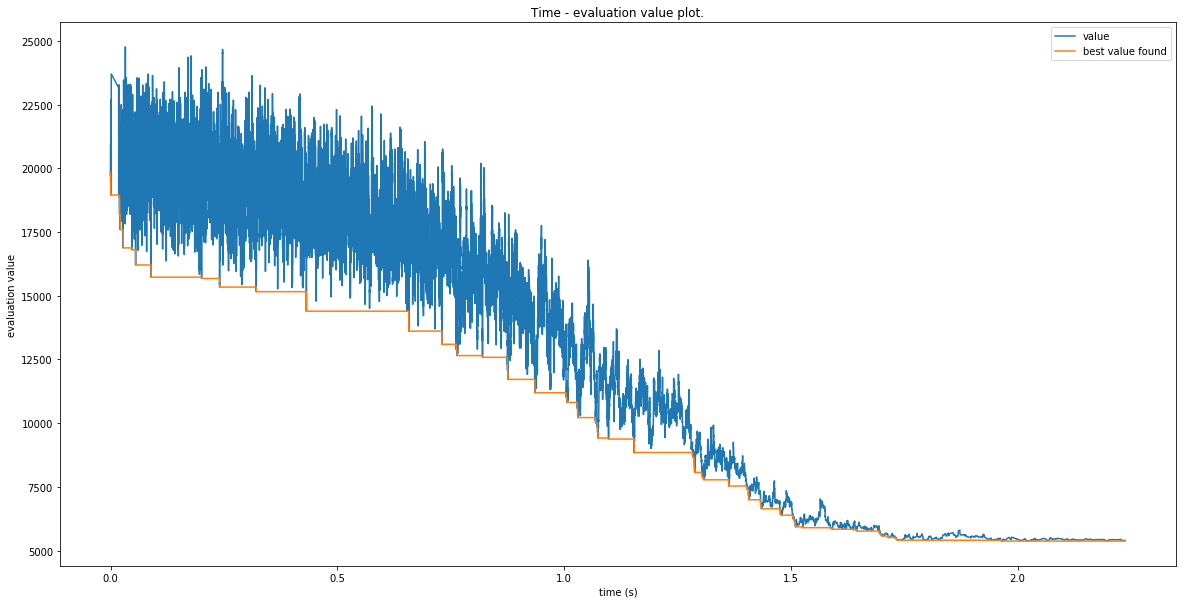

In [5]:
# value-time plot

plot(results_1.data)

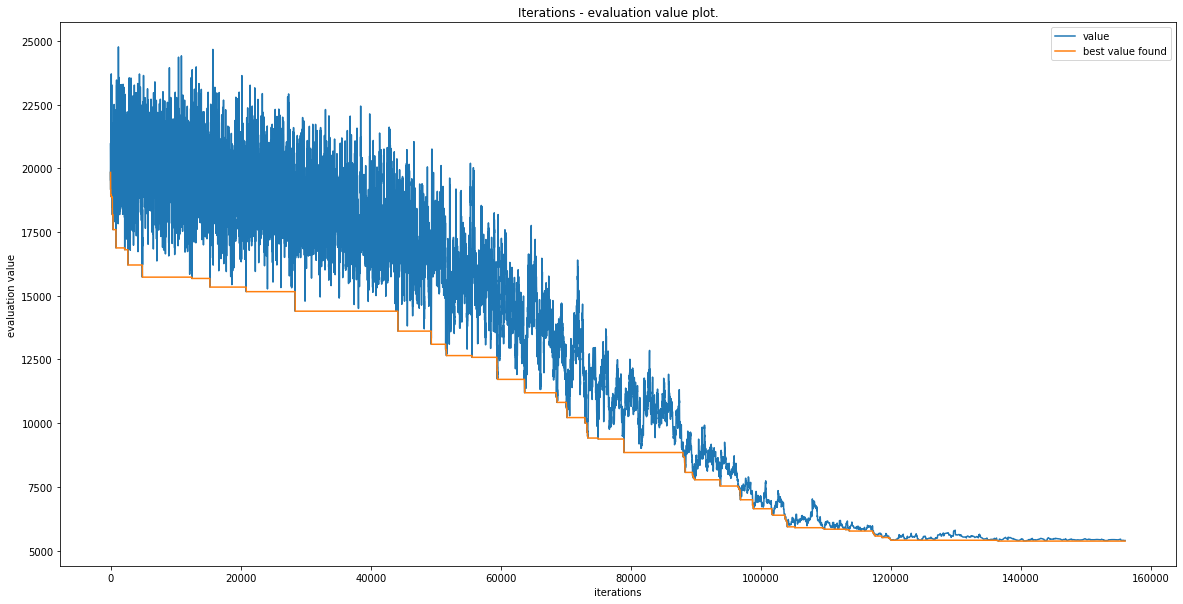

In [6]:
# value-iterations plot

iterations_plot(results_1.data)

### simulated annealing plotting data with matplotlib

In [7]:
# getting data from results (only used for plotting with matplotlib)

data = results_1.data

time = data.time
iterations = data.iteration
temperature = data.temperature
values = data.value
best_values = data.best_value

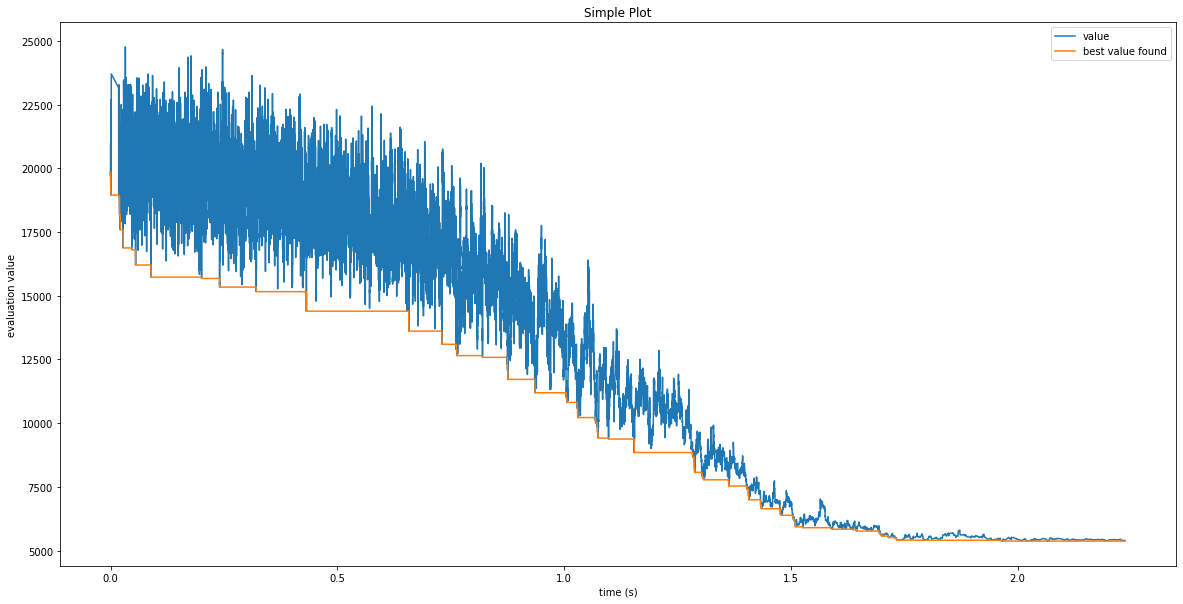

In [8]:
# plotting a value-time plot with matplotlib

plt.figure(figsize=(20,10))
plt.plot(time, values,label='value')
plt.plot(time, best_values, label='best value found')

plt.xlabel('time (s)')
plt.ylabel('evaluation value')

plt.title("Simple Plot")

plt.legend()

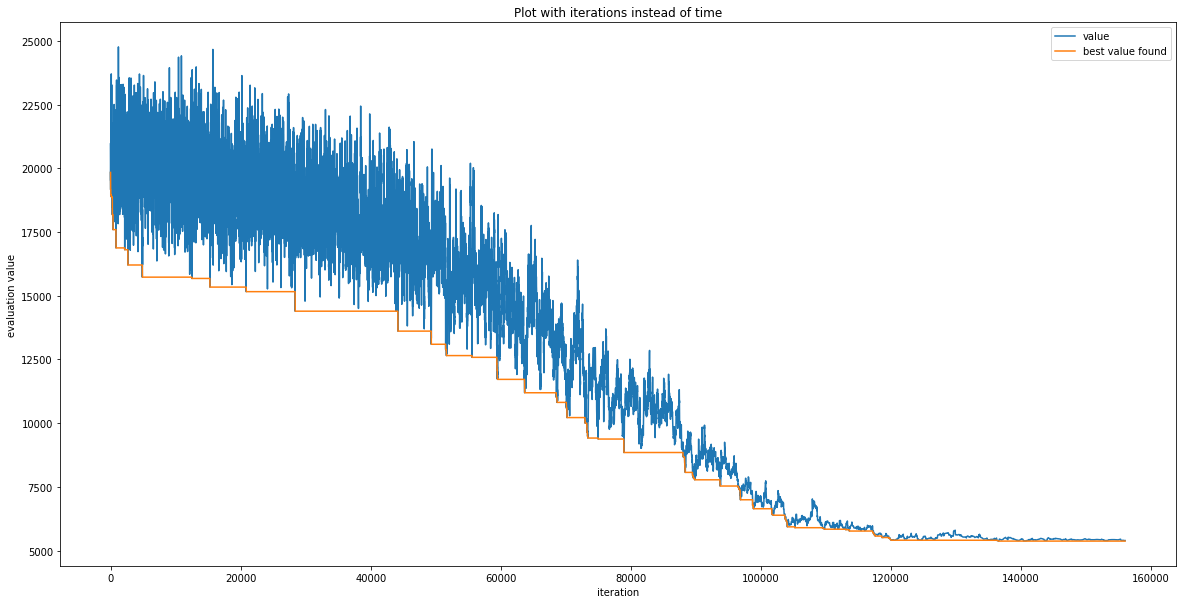

In [9]:
# plotting a value-iteration plot with matplotlib

plt.figure(figsize=(20,10))
plt.plot(iterations, values,label='value')
plt.plot(iterations, best_values, label='best value found')

plt.xlabel('iteration')
plt.ylabel('evaluation value')

plt.title("Plot with iterations instead of time")

plt.legend()

Text(0.5, 1.0, 'Temperature in function of the amount of iterations')

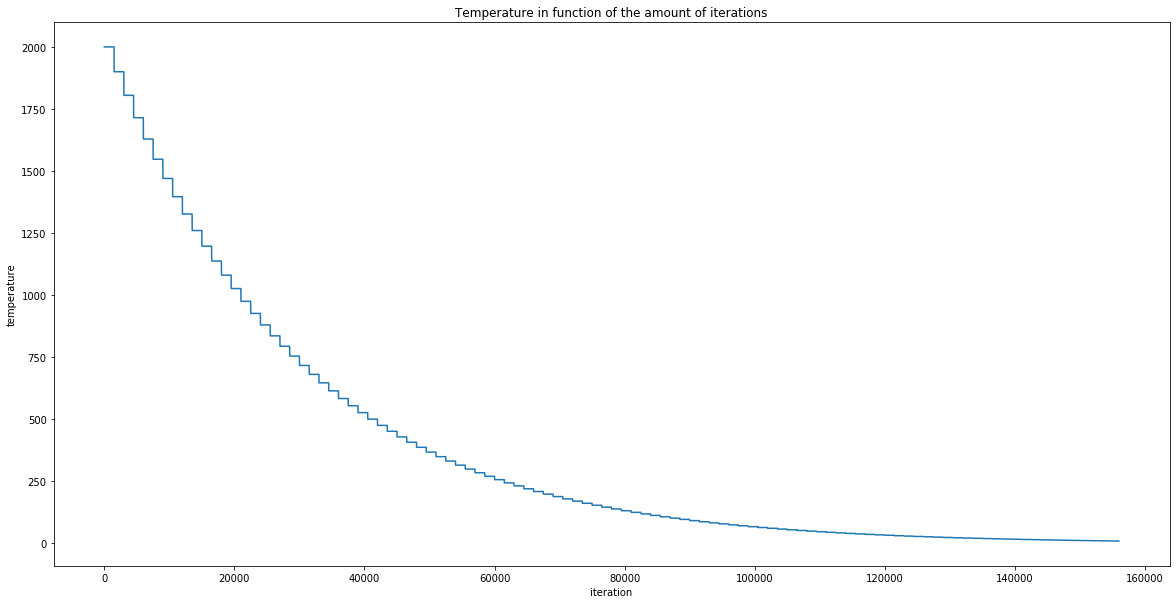

In [10]:
# plotting a temperature-iteration plot with matplotlib

plt.figure(figsize=(20,10))
plt.plot(iterations, temperature)

plt.xlabel('iteration')
plt.ylabel('temperature')

plt.title("Temperature in function of the amount of iterations")

## steepest descent

In [11]:
move_2 = TspArraySwap(size)

evaluation_2 = TspEvaluationFunction(distance_matrix, move_2)

problem_2 = ArrayProblem(evaluation_2, move_2, size)


algorithm_2 = SteepestDescent(problem_2, benchmarking=True, logging=False)
results_2 = algorithm_2.run()
print(results_2)

Results(best_order=array([ 0, 33, 18,  3,  2, 25,  7, 21,  8, 13, 35, 10,  5, 20, 16, 26, 31,
       46,  1, 19, 37, 29, 24, 40, 43, 28, 12, 15, 47, 14, 32,  4, 30, 11,
        9, 23, 36, 39, 38, 41, 34, 44, 42, 22, 17, 45, 27,  6]), best_value=7073, data=Data(time=array([0.       , 0.0096289, 0.0188545, 0.028548 , 0.0377235, 0.0465151,
       0.0548299, 0.0631948, 0.0715383, 0.0800819, 0.0884908, 0.0968658,
       0.1051584, 0.1134648, 0.1219062, 0.1304077, 0.1389157, 0.1473871,
       0.1559428, 0.1643507, 0.1727865, 0.1812539, 0.1897721, 0.1981678,
       0.2065395, 0.2147843, 0.2230703, 0.2314145, 0.239765 , 0.2480501,
       0.2563191, 0.2644321, 0.2727951, 0.2810894, 0.2895257, 0.2979315,
       0.3060485, 0.3142218, 0.3223644]), iteration=array([ 0,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37]), value=array([19837, 18381, 17226, 16206, 15138, 14149, 13407, 127

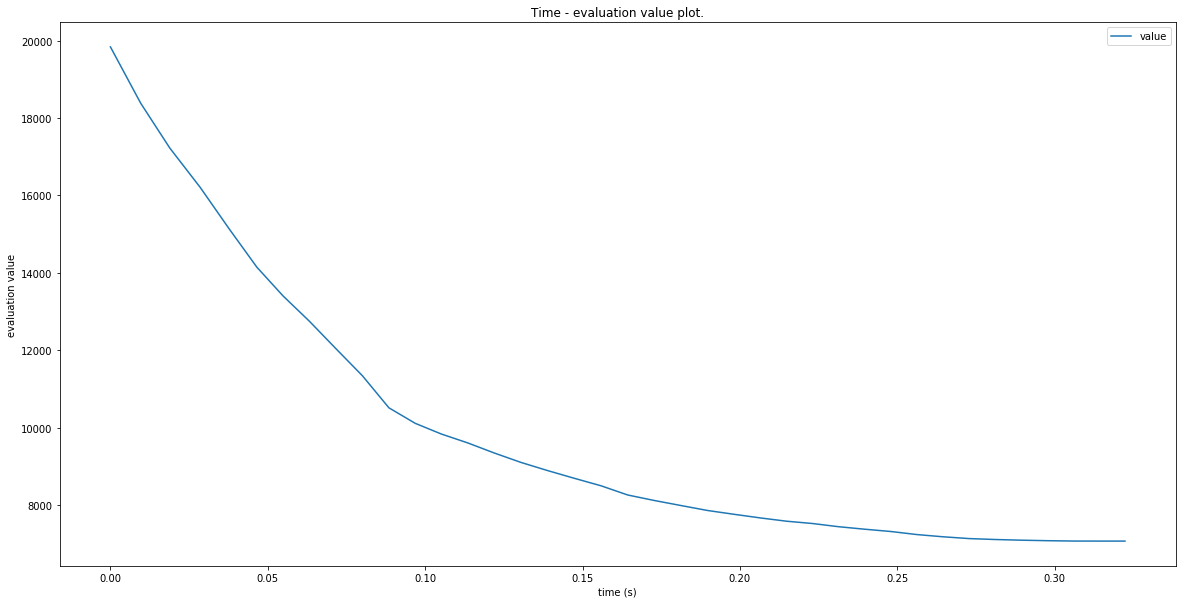

In [12]:
# value-time plot

plot(results_2.data)

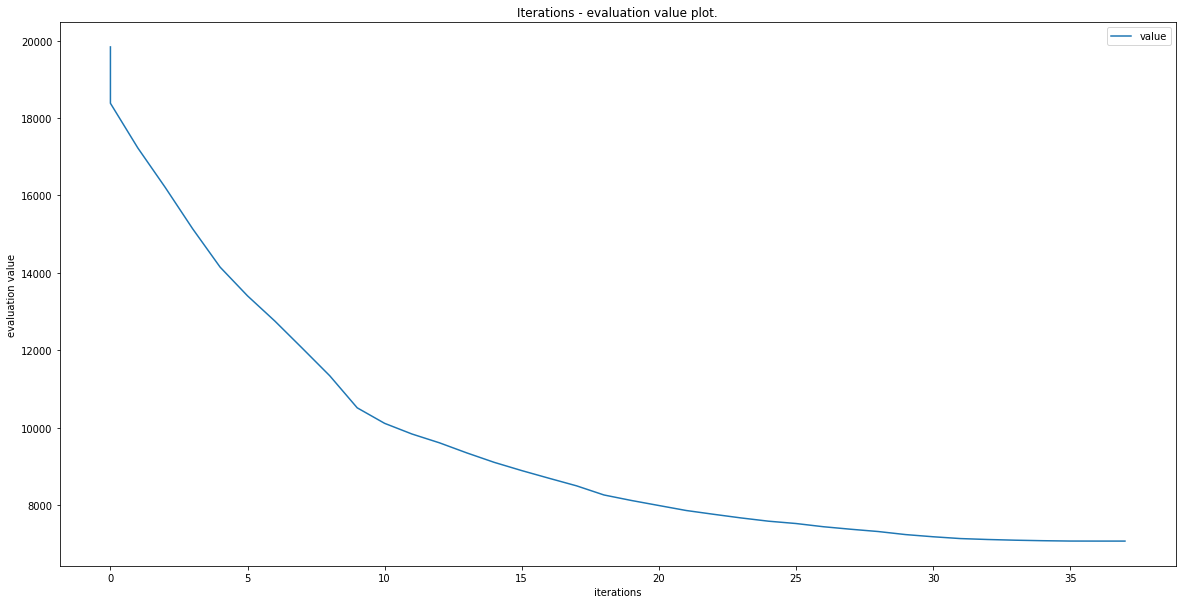

In [13]:
# value-iterations plot

iterations_plot(results_2.data)

## tabu search

In [14]:
move_3 = TspArraySwap(size)

evaluation_3 = TspEvaluationFunction(distance_matrix, move_3)

problem_3 = ArrayProblem(evaluation_3, move_3, size)

termination_3 = MaxSecondsTerminationCriterion(10)

diff_state_3 = SumDiffState()

algorithm_3 = TabuSearch(problem_3, termination_3, diff_state_3, 11, benchmarking=True, logging=False)
results_3 = algorithm_3.run()
print(results_3)

Results(best_order=array([ 0,  2, 18,  3, 29,  1, 46, 25,  5, 13,  8, 35, 10, 15, 47, 12,  6,
       27, 45, 33, 24, 22, 17,  7, 21, 20, 16, 26, 31,  4, 11,  9, 30, 32,
       14, 23, 36, 39, 38, 41, 34, 19, 37, 44, 42, 40, 43, 28]), best_value=6294, data=Data(time=array([0.00000000e+00, 9.82160000e-03, 1.92189000e-02, ...,
       9.99223660e+00, 1.00011518e+01, 1.00011540e+01]), iteration=array([   0,    0,    1, ..., 1123, 1124, 1125]), value=array([19837, 18381, 17226, ...,  6351,  6366,  6366]), best_value=array([19837, 18381, 17226, ...,  6294,  6294,  6294])))


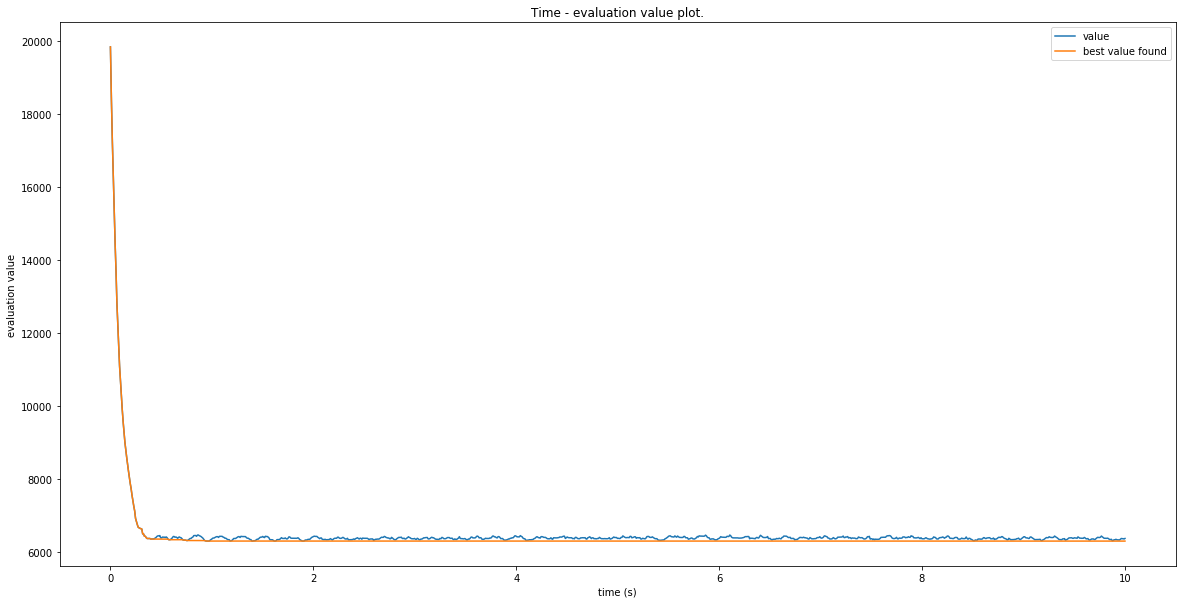

In [15]:
# value-time plot

plot(results_3.data)

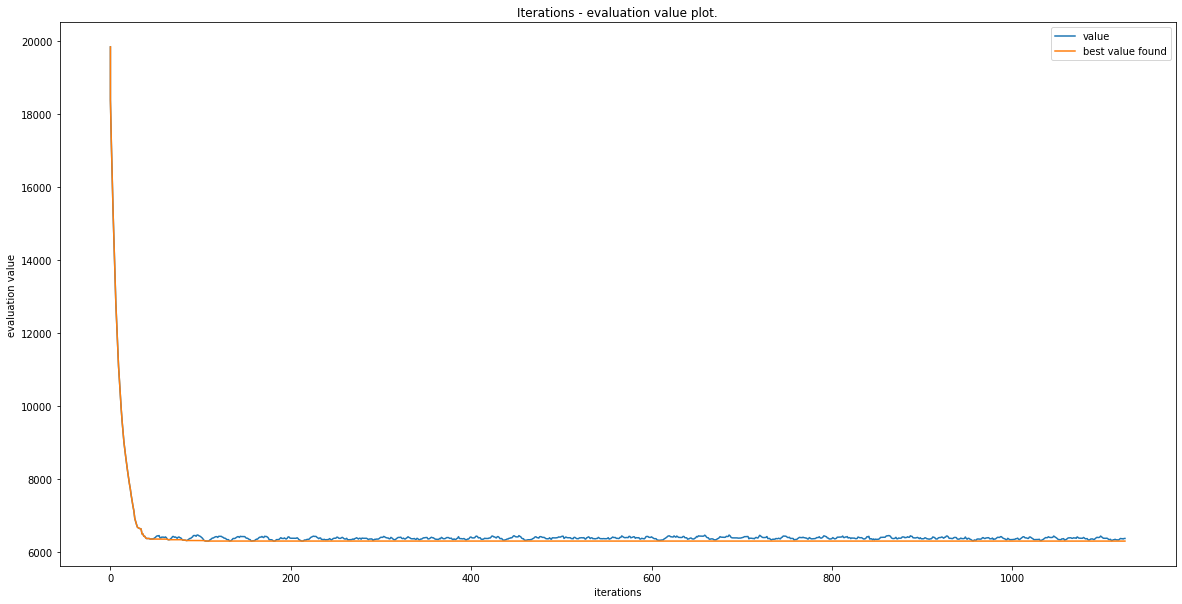

In [16]:
# value-iterations plot

iterations_plot(results_3.data)

## variable neighbourhood search

In [17]:
move_a = TspArraySwap(size)
move_b = ArrayReverseOrder(size)

moves = [move_a, move_b]

move_4 = MultiNeighbourhood(moves)

evaluation_4 = TspEvaluationFunction(distance_matrix, move_4)

problem_4 = ArrayProblem(evaluation_4, move_4, size)


algorithm_4 = VariableNeighbourhood(problem_4, benchmarking=True, logging=False)
results_4 = algorithm_4.run()
print(results_4)

Results(best_order=array([ 6, 28,  0, 12, 47, 15, 10, 35,  5, 13,  8, 20, 16, 26, 31, 21,  7,
       25, 14, 32,  4, 30, 11,  9, 23, 36, 46, 17, 45, 33, 22, 42, 44,  1,
       39, 38, 41, 34, 19, 37, 29,  3, 18,  2, 24, 40, 43, 27]), best_value=5097, data=Data(time=array([0.       , 0.0098929, 0.0193095, 0.0289939, 0.0380932, 0.046862 ,
       0.0553816, 0.0638987, 0.0727312, 0.0813896, 0.0904118, 0.0990363,
       0.1076604, 0.1162038, 0.1247007, 0.133224 , 0.1418278, 0.1502928,
       0.158882 , 0.167464 , 0.1763167, 0.185035 , 0.1937151, 0.2024915,
       0.2113025, 0.2201135, 0.2287696, 0.2372749, 0.2457893, 0.2542228,
       0.2628029, 0.2713273, 0.2798999, 0.2883298, 0.296745 , 0.3054752,
       0.3141679, 0.3227103, 0.3707064, 0.4184718, 0.426991 , 0.4355229,
       0.4441721, 0.4528219, 0.461457 , 0.4699744, 0.5178037, 0.5265817,
       0.5350968, 0.5436837, 0.552262 , 0.5607773, 0.5693411, 0.5778921,
       0.625924 , 0.6345583, 0.6432275, 0.6907133, 0.7390609, 0.786677 ,
    

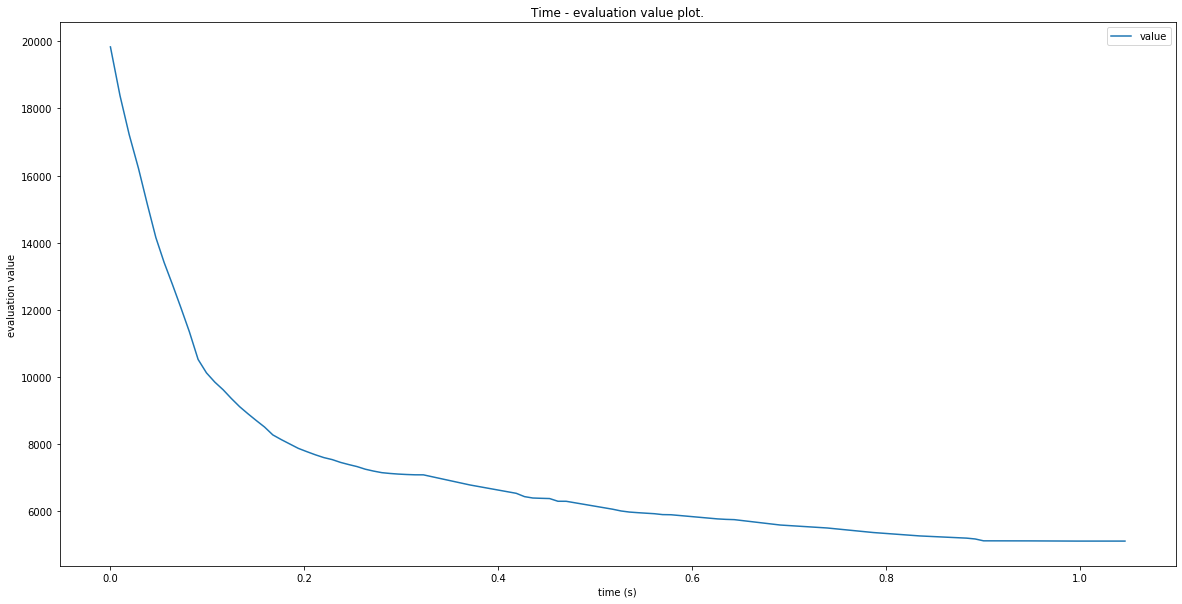

In [18]:
# value-time plot

plot(results_4.data)

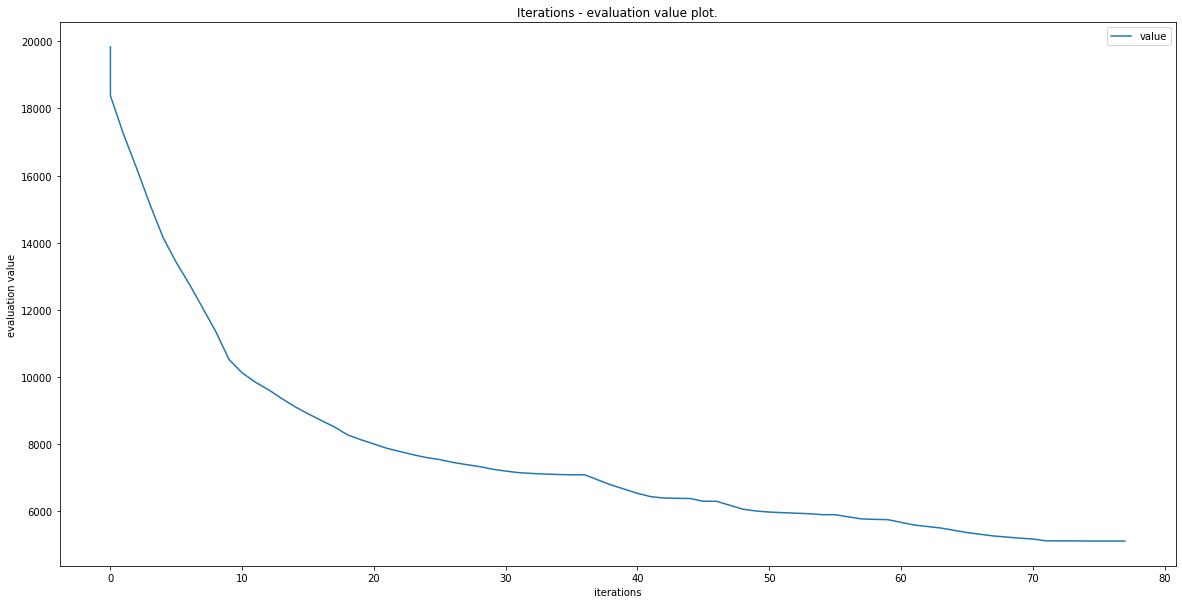

In [19]:
# value-iterations plot

iterations_plot(results_4.data)